# Predictive Analysis Classifier

Building a classifier to predict if a passenger survived the RMS Titanic, given their gender, age, economic background among other feature. 

Data: 

**Author: Ashwin Padmanabhan**    
**Date: 4/14/2020**

## Step 1: Get and familiarize the data. 

In [1]:
import numpy as np
import pandas as pd
import os

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

path = "data/"

def getdata(path = path):
    train = pd.read_csv(os.path.join(path, "train.csv"))
    test = pd.read_csv(os.path.join(path, "test.csv"))
    test_target = pd.read_csv(os.path.join(path, "gender_submission.csv"))
    test = test.set_index('PassengerId').join(test_target.set_index('PassengerId'))
    return [train, test]

[train, test] = getdata()

In [2]:
#Testing good data import
#train.head()
#test.head(10)
#len(test_target)
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [3]:
#High level check of null: 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#Getting to know the continuous data. 
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Insights: 

- 891 Data points, very small data set. 
- Age has potential null values. Note, age is float64 since Null values exist. 
- Average age of pasengers just 29. 
- 3 "Pclass": 1st, 2nd, 3rd. 
- Only 38% people survived. 
- SibSp: Number of siblings aboard the Titanic. 
- Number of Parents/Children aboard the Titanic. 

In [5]:
# Getting to know the categorical data: 

pd.crosstab(train.Sex, train.Survived, normalize = "index")

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


### EDA: 


In [6]:
titan = train.copy()

numerical_labels = list(titan.select_dtypes(include = ["int64", "float64"]))
categorical_labels = list(titan.select_dtypes(include = "object"))
print("Numerical feature: ", numerical_labels)
print("Categorical features", categorical_labels)

Numerical feature:  ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical features ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


#### Chaging dypes: 

"Survived", "Pclass", "SibSp", "Parch" are categorical/ordinal in nature. Changing these features:

In [7]:
titan = titan.astype({"Survived": object, "SibSp": object, "Parch": object})

numerical_labels = list(titan.select_dtypes(include = "int64"))
categorical_labels = list(titan.select_dtypes(include = "object"))
print("Numerical feature: ", numerical_labels)
print("Categorical features", categorical_labels)

Numerical feature:  ['PassengerId', 'Pclass']
Categorical features ['Survived', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121b190b8>,
      dtype=object)

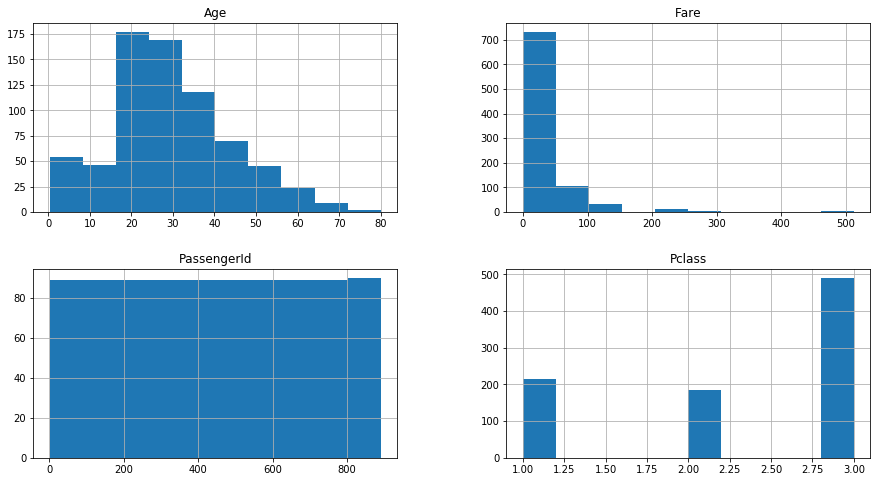

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

titan.hist(figsize = (15,8))

### Insights: 

- Age is normally distributed. 
- Most people in 3rd class. 
- Tail heavy #siblings. 
- Tail heavy number of parents/children. 

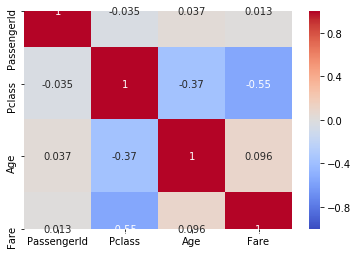

In [9]:
## Check correlations: 
import seaborn as sns
from pandas.plotting import scatter_matrix

corr_mat = titan.corr()
sns.heatmap(corr_mat, cmap = "coolwarm", annot = True, center = 0, vmin = -1, vmax =1)

//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


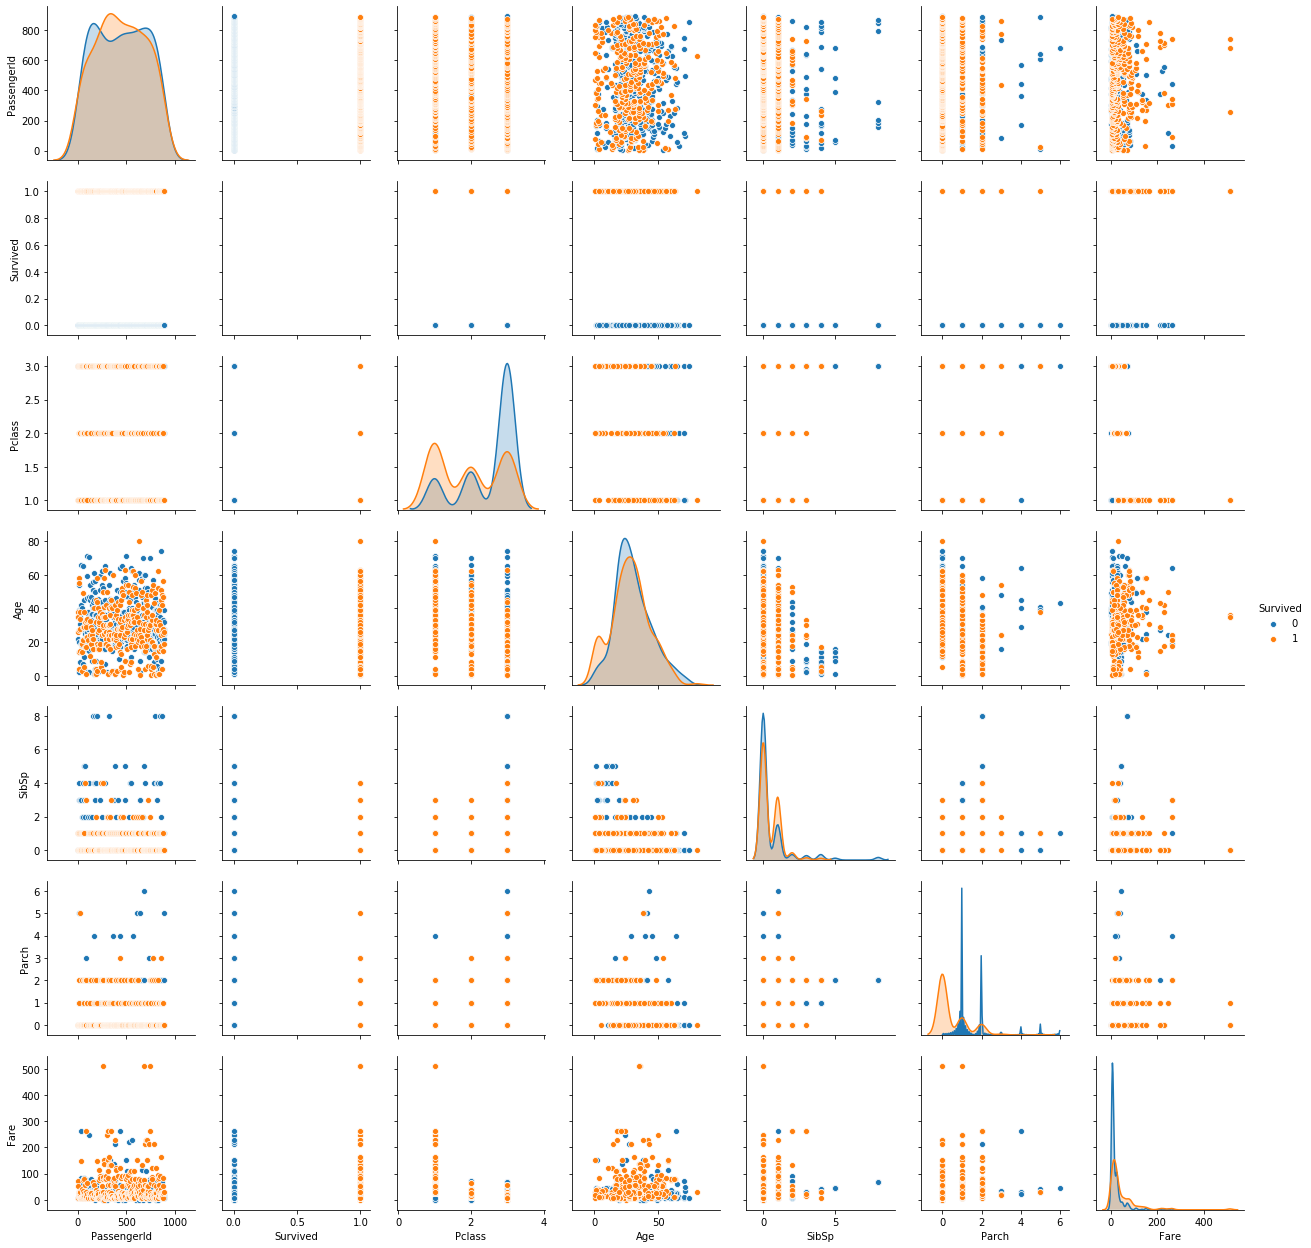

In [10]:
scatter_labels = numerical_labels+ ["Age", "Fare"]
#scatter_matrix(titan[scatter_labels], figsize = (15,10))

sns.pairplot(titan, hue = "Survived")

#### Insights 

- Proportion of survived to not survived is low for 3rd class passengers
- People who are older tend to have lesser number of siblings. 
- People who are older seem to have lesser number of family. This is weird. 

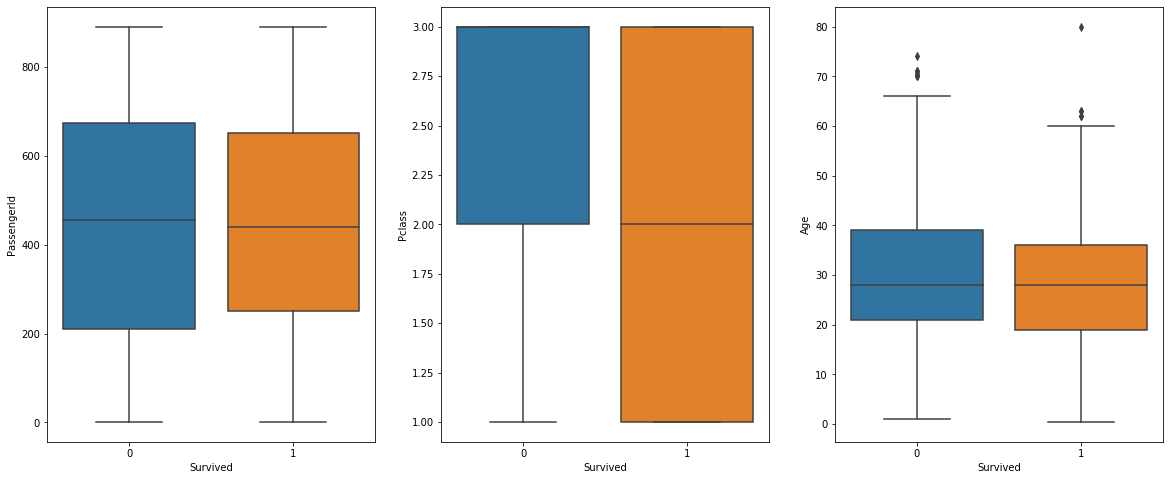

In [11]:
## Boxplots to see effect of categorical variables
boxplot_labels = numerical_labels + ["Age", "Fare"]
fig, ax = plt.subplots(1, 3, figsize = (20,8))

for category, subplot in zip(boxplot_labels, ax.flatten()):
    sns.boxplot(y = titan[category], x = titan["Survived"], ax = subplot)

#### Insights: 

- PasengerID has no effect on survival. 
- Younger people tending to survive more. 
- Higher the fare, higher the survival rate. 

- Remove pasengerID. 

#### Explore Categorical Variables: 


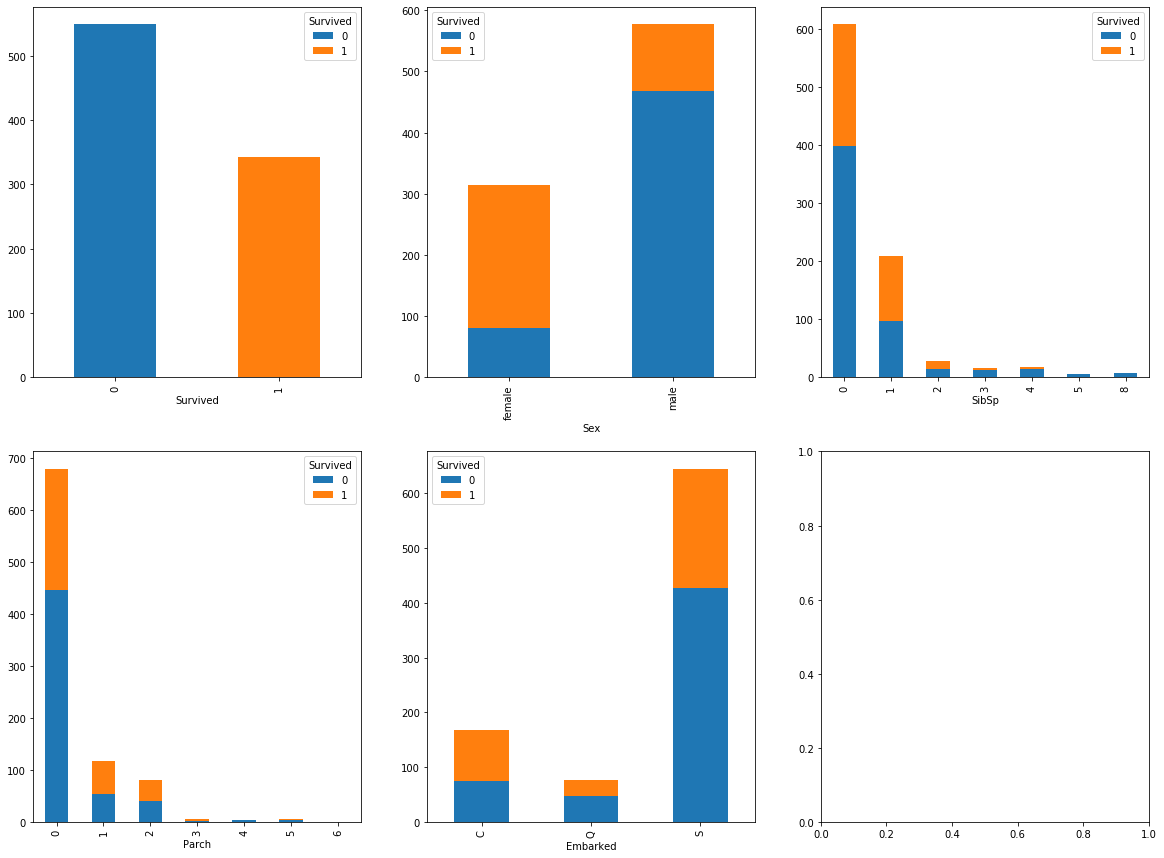

In [12]:
#With stacked- unscaled cross tab plot. 

fig, ax = plt.subplots(2,3, figsize = (20,15))

categorical_labels_cp = [i for i in categorical_labels if i!= "Name" and i!= "Ticket" and i!= "Cabin"]
for category, subplot in zip(categorical_labels_cp, ax.flatten()):
    cross_tab = pd.crosstab(index = titan[str(category)], columns = titan["Survived"] )
    cross_tab.plot(kind = "bar", stacked = True, ax = subplot)

### Insights: 

- SibSp is skewed. Might want to remove this column or bin.
- Parch is skewed. Might want to remove or bin. 

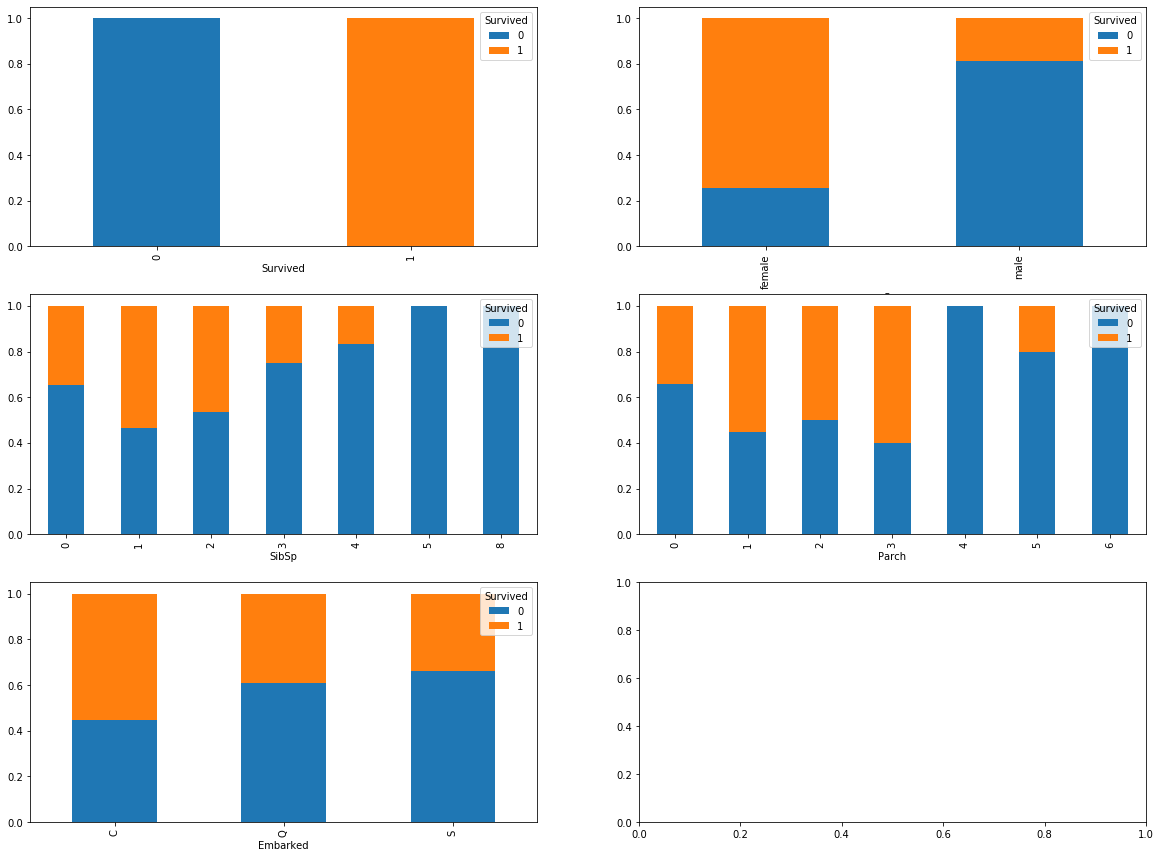

In [13]:
# With stacked, scaled cross tab plot:

fig, ax = plt.subplots(3, 2, figsize = (20,15))

for category, subplot in zip(categorical_labels_cp, ax.flatten()):
    cross_tab = pd.crosstab(index = titan[str(category)], columns = titan["Survived"], normalize = "index")
    cross_tab.plot(kind = "bar", stacked = True, ax = subplot)

### Insights: 

- 3rd class people have higher proportion of dying. 
- Males have a lower survival rate. 
- Embarked have lower when "C". 
- Parch seems to be a little noisy. 


## Data Cleaning:

In [14]:
#First we create a target and remove from the train and test set. 

from sklearn.preprocessing import LabelEncoder

train_target = titan["Survived"]
encode = LabelEncoder()
encode.fit_transform(train_target)

test_target = test["Survived"]
encode = LabelEncoder()
encode.fit_transform(test_target)

titan.drop("Survived", axis = 1, inplace = True)
test.drop("Survived", axis = 1, inplace = True)
test.head()

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [15]:
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [92]:
from sklearn.base import TransformerMixin, BaseEstimator
import copy
import statistics

#Creating custom classes for Pipeline. 

class removeattr(TransformerMixin, BaseEstimator):
    """
    To remove unwanted features
    Param: 
        data is a pd data frame. Note: To be used before dfselector.
    Return pd df. 
    """
    def __init__(self, columns):
        self.columns = columns
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        return X.drop(self.columns, axis =1 )

class HandleNull(TransformerMixin, BaseEstimator):
    """
    Param: 
        - Column name to be handled. 
        - Data for class method as pd df. 
        - Strategy = ["Median"]
        Note: Should be used before dfselector. 
    Return:
        - pd df with median replacement. 
    """
    def __init__(self, col_name, strategy = "Median"):
        self.col_name = col_name
        self.strategy = strategy
    def fit(self, X, y = None):
        return self
    def transform(self, X, y= None):
        if self.strategy == "Median":
            median = X[self.col_name].median()
            X[self.col_name].fillna(median, inplace = True)
            return X
        else: 
            print("Unsupported impute.. removing columsn with NA")
            X = X.dropna(subset = [self.col_name])
            return X

class binary_binner(TransformerMixin, BaseEstimator):
    """
    To be used before dfselector.
    Param:
        col_name= Column to be bin. Assert list.  
        single_bin_val = Value in this will be it's own bin. All other vals will be the second bin. Assert list. 
        replace_val = replace other vals with this. Assert list. 
    Return:
        pd df with binned vals.
    """
    def __init__(self, col_name, single_bin_val, replace_val):
        assert(len(col_name) == len(single_bin_val)==len(replace_val)), "col_name, single_bin_val, replace_val must be of same length"
        self.col_name = col_name
        self.single_bin_val = single_bin_val
        self.replace_val = replace_val
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        for col in range(len(self.col_name)):
            X.loc[(X[self.col_name[col]] != self.single_bin_val[col] ), self.col_name[col]] = self.replace_val[col]
        return X

class continuous_binner(TransformerMixin, BaseEstimator):
    def __init__(self, col_name = "Age", numbins= 10):
        self.col_name = col_name
        self.numbins = numbins
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        X[[self.col_name]] = pd.cut(X[self.col_name], self.numbins, labels = False)
        return X

class onehot(TransformerMixin, BaseEstimator):
    def __init__(self):
        self 
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        return pd.get_dummies(X)
    
    
class scaler(TransformerMixin, BaseEstimator):
    def __init__(self, col_ix = 4):
        self.col_ix = col_ix
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        mean = statistics.mean(X[:,self.col_ix])
        std = statistics.stdev(X[:, self.col_ix])
        for i in range(len(X[:, self.col_ix])):
            X[i, self.col_ix] = (X[i, self.col_ix] - mean)/std
        return X
    
class dfselector(TransformerMixin, BaseEstimator):
    """
    To convert pd df to np. 
    Param:
        - Columns to be converted. 
        - pd data frame for class method. 
    Return: 
        n-nd np array
    """
    def __init__(self, attr_name = "All"):
        if attr_name != "All":
            self.attr_name = attr_name
        else:
            self.attr_name = None
    def fit(self,X, y = None):
        return self
    def transform(self, X, y = None):
        if self.attr_name == None:
            self.attr_name = list(X.columns)
        return X[self.attr_name].values

### Consolidated comments:

The following operations will be carried out to clean the data: 


    Bins:
       - SibSp and Parch will be binned as zero and greater than zero. 
       - Embarked will be binned: "S" will remain "S" and ["C","Q"] will be labels as "M" for middle. 
    Remove: 
        - PasengerID will be removed. 
        - Name will be removed. 
        - Ticked will be removed. 
        - Cabin is removed. Cabin and PClass have high correlation=> Only Pclass = 1 have non-null Cabin value. 
    Null handling: 
        - Null ages will be replaced by median. 
        - 2 instances with Embarked = Null will be removed. 
        

In [102]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

all_labels = categorical_labels + ["Age"]
pp_label = [i for i in all_labels if i not in ["PassengerId", "Name", "Ticket", "Cabin", "Survived"]]

pipeline = Pipeline([                   
                            ("nullhandler_embarked", HandleNull(col_name = "Embarked", strategy = "remove")),
                            ("binner", binary_binner(col_name = ["SibSp", "Parch", "Embarked"],single_bin_val = [0,0,"S"], replace_val = [1, 1, "M"])), 
                            ("removeattr", removeattr(columns = ["PassengerId", "Name", "Ticket", "Cabin"])), 
                            ("nullhandler_age", HandleNull(col_name = "Age") ), 
                            ("agebinner", continuous_binner()),
                            ("onehot", onehot()),
                            ("dfconvertor", dfselector(attr_name = "All")), 
                            ("std_scaler", scaler(col_ix = 4)),
    
                        ])


In [103]:
#Run the pipeline. 

model_data = copy.deepcopy(titan)

pipeline.fit(model_data)
model_ready = pipeline.transform(model_data)

Unsupported impute.. removing columsn with NA


Pipeline(memory=None,
         steps=[('nullhandler_embarked',
                 HandleNull(col_name='Embarked', strategy='remove')),
                ('binner',
                 binary_binner(col_name=['SibSp', 'Parch', 'Embarked'],
                               replace_val=[1, 1, 'M'],
                               single_bin_val=[0, 0, 'S'])),
                ('removeattr',
                 removeattr(columns=['PassengerId', 'Name', 'Ticket',
                                     'Cabin'])),
                ('nullhandler_age',
                 HandleNull(col_name='Age', strategy='Median')),
                ('agebinner', continuous_binner(col_name='Age', numbins=10)),
                ('onehot', onehot()),
                ('dfconvertor',
                 dfselector(attr_name=['Pclass', 'Age', 'SibSp', 'Parch',
                                       'Fare', 'Sex_female', 'Sex_male',
                                       'Embarked_M', 'Embarked_S'])),
                ('std_scaler', scal

Unsupported impute.. removing columsn with NA


## Building Models: